In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
data=pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
data.isnull().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [7]:
data.duplicated().sum()

0

In [8]:
data=data.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [9]:
data["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
data.value_counts("Gender")

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

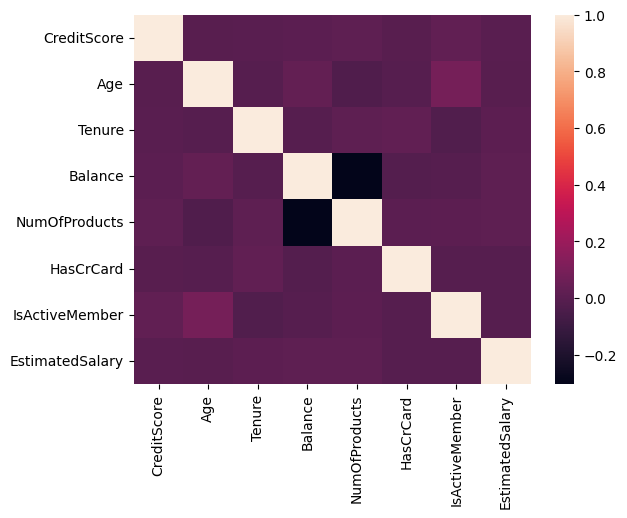

In [13]:
sns.heatmap(data[["CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]].corr())

In [14]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


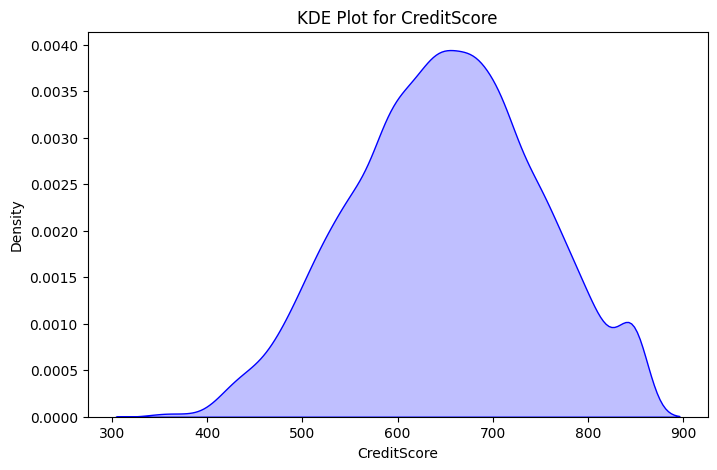

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


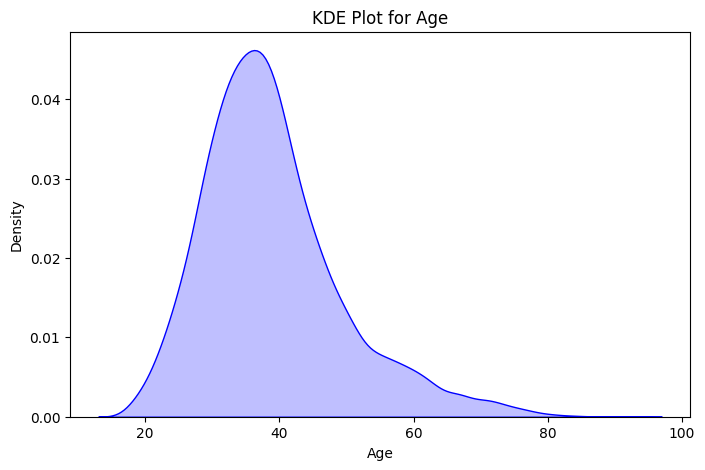

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


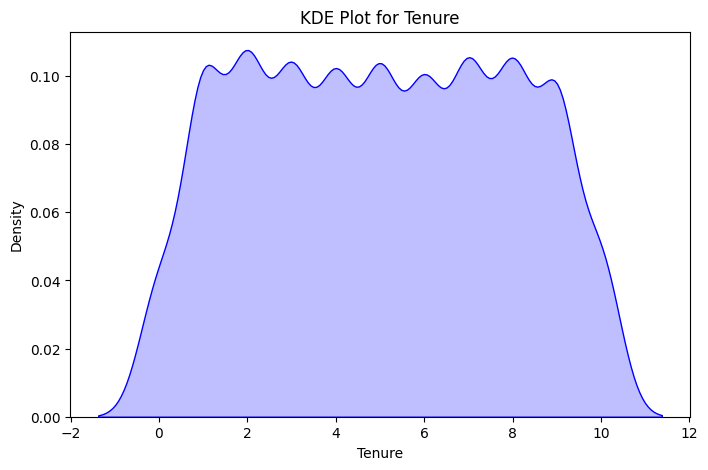

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


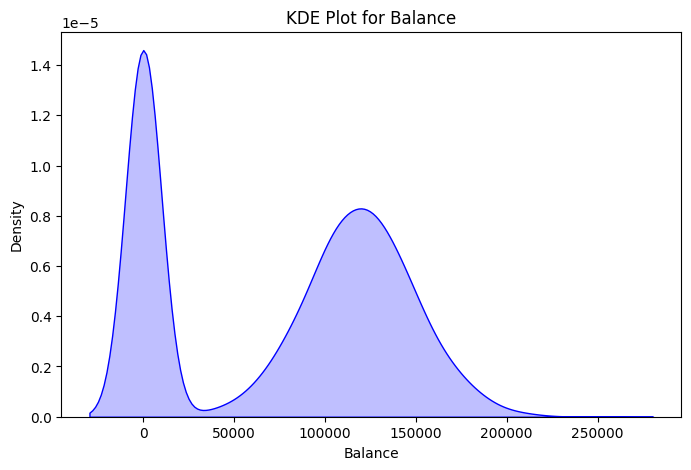

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


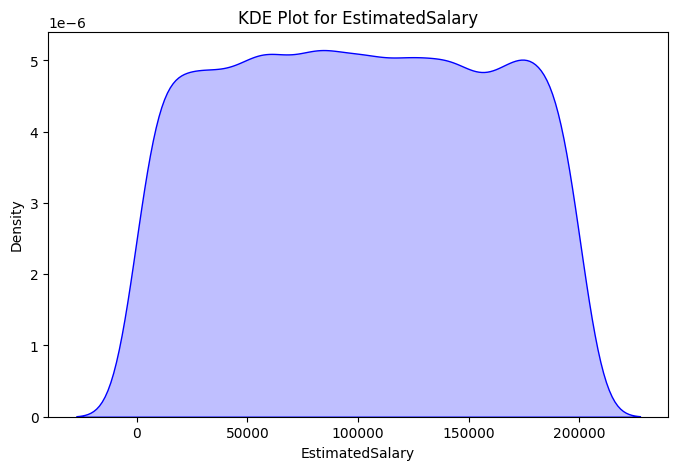

In [15]:
numcol=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
for col in numcol:
    plt.figure(figsize=(8, 5))  # Create a new figure for each plot
    sns.kdeplot(data[col], color='blue', fill=True)
    plt.title(f'KDE Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()  # Display the plot and close it before the next one

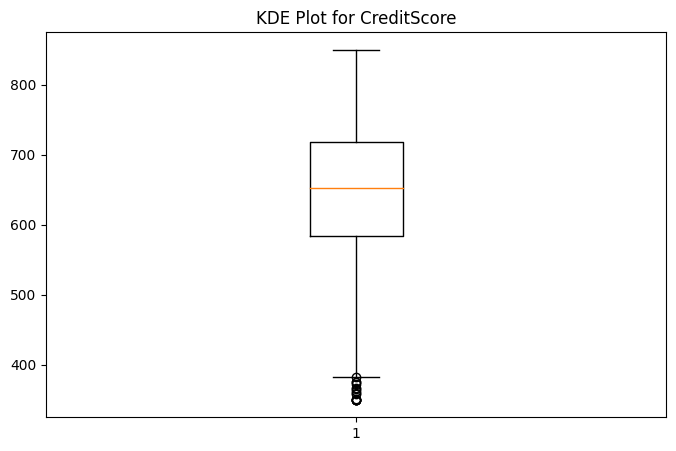

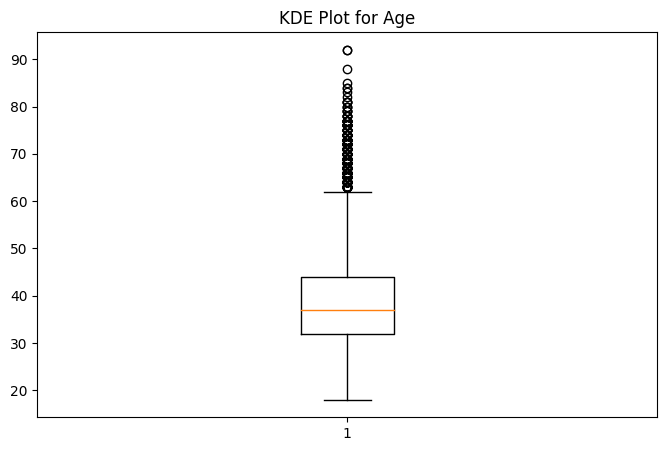

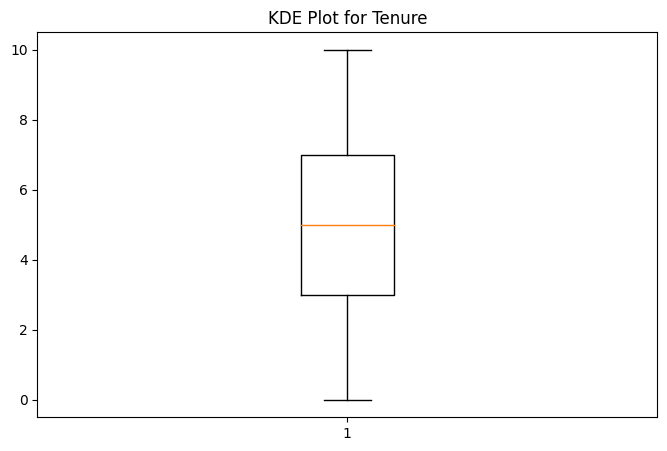

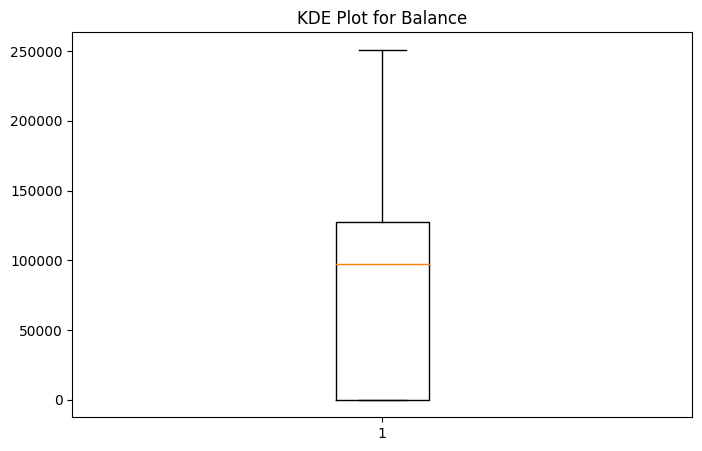

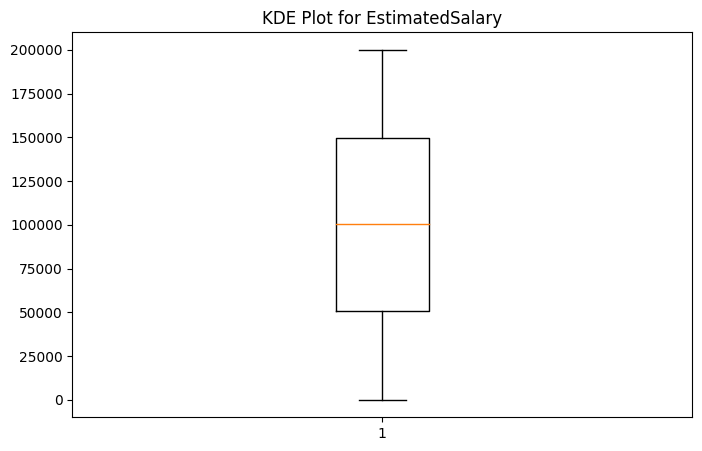

In [16]:
for col in numcol:
    plt.figure(figsize=(8, 5))  # Create a new figure for each plot
    plt.boxplot(data[col])
    plt.title(f'KDE Plot for {col}')
    plt.show()  # Display the plot and close it before the next one

In [17]:
# q1=data["CreditScore"].quantile(0.25)
# q3=data["CreditScore"].quantile(0.75)
# max_limit=q3+(1.5*(q3-q1))
# min_limit=q3-(1.5*(q3-q1))

# data["CreditScore"]=np.where(data["CreditScore"]<min_limit,min_limit,data["CreditScore"])

In [18]:
outcol=["CreditScore","Age"]
for outlier in outcol:
    q1=data[outlier].quantile(0.25)
    q3=data[outlier].quantile(0.75)
    max_limit=q3+(1.5*(q3-q1))
    min_limit=q3-(1.5*(q3-q1))

    data[outlier]=np.where(data[outlier]<min_limit,min_limit,np.where(data[outlier]>max_limit,max_limit,data[outlier]))
    

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf

2025-07-19 19:02:31.264367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752951751.472310      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752951751.531767      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
X=data.drop(['Exited'],axis=1)
Y=data["Exited"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [21]:
x_train.shape

(7000, 10)

In [22]:
cat_column=["Geography","Gender"]
num_col=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

In [23]:
num_pipeline=Pipeline([("pow trans",PowerTransformer(method="yeo-johnson"))])
cat_pipeline=Pipeline([("ohe trans",OneHotEncoder(handle_unknown="ignore",drop="first"))])

In [24]:
ct=ColumnTransformer([("categorical",cat_pipeline,cat_column),
                    ("numerical",num_pipeline,num_col)],remainder="passthrough")

In [25]:
pipe=Pipeline([("preprocessing",ct)])

In [26]:
x_train_processed=pipe.fit_transform(x_train)
x_test_processed=pipe.transform(x_test)

In [27]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(11, activation='relu',input_dim=11),
  tf.keras.layers.Dense(11, activation='relu'),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752951763.684375      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752951763.685035      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [30]:
model.fit(x_train_processed,y_train,epochs=50,validation_split=0.2)

Epoch 1/50


I0000 00:00:1752951766.388655      64 service.cc:148] XLA service 0x79c37c008210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752951766.389133      64 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752951766.389154      64 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752951766.624555      64 cuda_dnn.cc:529] Loaded cuDNN version 90300


 76/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6301 - loss: 0.6513

I0000 00:00:1752951767.268461      64 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7049 - loss: 0.6045 - val_accuracy: 0.8129 - val_loss: 0.4558
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8277 - loss: 0.4340 - val_accuracy: 0.8279 - val_loss: 0.4189
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8281 - loss: 0.4187 - val_accuracy: 0.8293 - val_loss: 0.4087
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8350 - loss: 0.4019 - val_accuracy: 0.8307 - val_loss: 0.4026
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8410 - loss: 0.3889 - val_accuracy: 0.8293 - val_loss: 0.3998
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8331 - loss: 0.4005 - val_accuracy: 0.8379 - val_loss: 0.3985
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8436 - loss: 0.3827 - val_accuracy: 0.8350 - val_loss: 0.3952
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8329 - loss: 0.3926 - val_accuracy: 0.8343 - val_

In [31]:
y_log=model.predict(x_test_processed)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [32]:
y_pred=np.where(y_log>5,1,0)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7916666666666666